In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

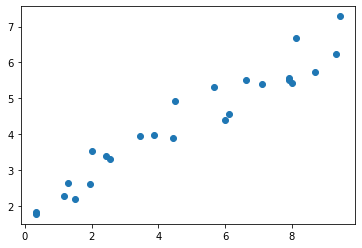

In [2]:
## Creating random data for linear regression model
m, c = 0.50, 2
x, y = [], []
for i in range(25):    
    x.append(random.uniform(0, 10))
    
for xx in x:
    error = random.uniform(-1, 1)/1.5
    y.append(((xx*m)+error) + c)
    
plt.scatter(x, y)
plt.show()

## Linear regression using OLS
 B0 = ∑ ( (xi - mean(x) * (yi - mean(y)) ) / ∑(xi - mean(x))<br>
 B1 = ∑ (mean(y) - B0 * mean(x))^2

In [3]:
## Calculating co-effecients
b0 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum(np.square(x - np.mean(x)))
b1 = np.mean(y) - (b0 * np.mean(x))
print(b0, b1)

0.49674707131336177 1.9196974591775802


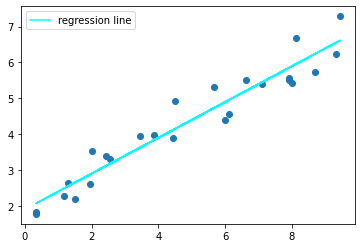

In [4]:
## Calculating and plotting predictions
yhat = []
for xx in x:
    yhat.append(b0*xx + b1)
    
plt.scatter(x, y)   
plt.plot(x, yhat, c = 'cyan', label = 'regression line')
plt.legend()
plt.show()

In [5]:
## Calculating the error
import math
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return math.sqrt(mean_error)
print(rmse_metric(yhat, y))

0.4167338505312003


## Implementing linear regression using gradient descent